### Import all necessary libraries

In [3]:
# Step 0: Import Required Libraries

# Data handling
import pandas as pd
import numpy as np

# Data preprocessing and encoding
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Oversampling and imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


### Step 1: Dataset Description

#### Briefly describe the dataset (features, target variable, number of samples).


In [5]:
# Step 1: Dataset Description

# Load the dataset
df = pd.read_csv("placementdata.csv")

# Display the first few rows
print("First 5 Rows of the Dataset:")
display(df.head())

# Display shape (number of samples and features)
print(f"\nDataset contains {df.shape[0]} samples and {df.shape[1]} features.\n")

# Information about data types and missing values
print("Data Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check target variable distribution
print("\nTarget Variable ('PlacementStatus') Distribution:")
print(df['PlacementStatus'].value_counts())


First 5 Rows of the Dataset:


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed



Dataset contains 10000 samples and 12 features.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory 

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000



Target Variable ('PlacementStatus') Distribution:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


### Step 2: Data Preprocessing

#### Handle missing values if any



In [7]:
# Step 2: Data Preprocessing

# Drop irrelevant column
df.drop(columns=['StudentID'], inplace=True, errors='ignore')

# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


#### Convert categorical variables (if present) into numerical format

In [9]:
# Encode categorical variables using Label Encoding
le = LabelEncoder()

# Columns to encode: ExtracurricularActivities, PlacementTraining, PlacementStatus
df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])  # Yes/No → 1/0
df['PlacementTraining'] = le.fit_transform(df['PlacementTraining'])                  # Yes/No → 1/0
df['PlacementStatus'] = le.fit_transform(df['PlacementStatus'])                      # Placed/NotPlaced → 1/0

#### Split the dataset into training and testing sets (e.g., 80-20 split)

In [11]:
# Separate features and target
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Training data",X_train.shape)
print("Test data",X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Training data (8000, 10)
Test data (2000, 10)
PlacementStatus
0    0.58025
1    0.41975
Name: proportion, dtype: float64
PlacementStatus
0    0.5805
1    0.4195
Name: proportion, dtype: float64


### Step 3: Model Implementation

#### Implement Naïve Bayes classifier


In [13]:
# Step 3: Model Implementation

# Naïve Bayes pipeline and grid parameters
nb_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

nb_param_grid = {
    'classifier__var_smoothing': np.logspace(-9, -1, 9)
}


#### Implement Logistic Regression classifier


In [15]:
# Logistic Regression pipeline and grid parameters
lr_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  # solver that supports l1/l2
}


#### Train both models on the training data

In [17]:
#Fitting Naïve Bayes
nb_grid = GridSearchCV(nb_pipeline, nb_param_grid, cv=skf, scoring='f1', n_jobs=-1)
nb_grid.fit(X_train, y_train)
nb_preds = nb_grid.predict(X_test)
print("Best Naïve Bayes Params:", nb_grid.best_params_)

#Fitting Logistic Regression
lr_grid = GridSearchCV(lr_pipeline, lr_param_grid, cv=skf, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)
lr_preds = lr_grid.predict(X_test)
print("Best Logistic Regression Params:", lr_grid.best_params_)

Best Naïve Bayes Params: {'classifier__var_smoothing': 1e-09}
Best Logistic Regression Params: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


### Step 4: Model Evaluation

#### Compute accuracy, precision, recall, and F1-score for both models


In [19]:
# Step 4 - Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

evaluate_model("Naïve Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)



Naïve Bayes Evaluation
Accuracy : 0.7985
Precision: 0.7390350877192983
Recall   : 0.8033373063170441
F1 Score : 0.7698458023986293

Logistic Regression Evaluation
Accuracy : 0.7975
Precision: 0.7303609341825902
Recall   : 0.8200238379022646
F1 Score : 0.772599663110612


#### Use confusion matrices and classification reports for a better comparison
##### Confusion Matrix

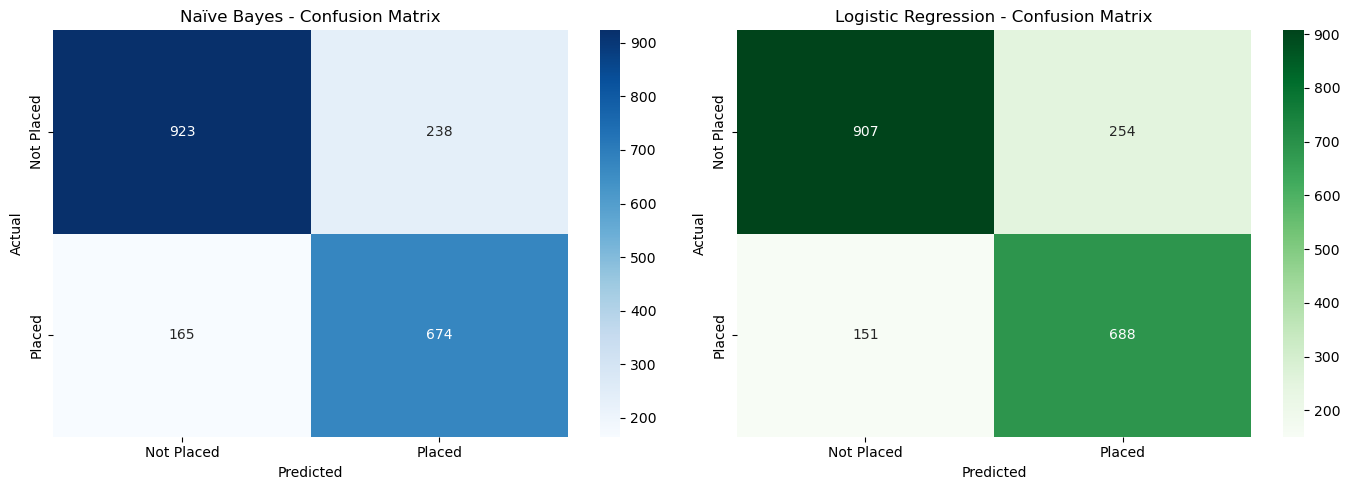

In [21]:
# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix values
cm_nb = confusion_matrix(y_test, nb_preds)
cm_lr = confusion_matrix(y_test, lr_preds)

# Plot for Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Naïve Bayes - Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")
axs[0].set_xticklabels(['Not Placed', 'Placed'])
axs[0].set_yticklabels(['Not Placed', 'Placed'])

# Plot for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Logistic Regression - Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")
axs[1].set_xticklabels(['Not Placed', 'Placed'])
axs[1].set_yticklabels(['Not Placed', 'Placed'])

plt.tight_layout()
plt.show()


##### Classification Reports

In [23]:
from sklearn.metrics import classification_report
import pandas as pd

# Step 1: Get classification report as dicts
report_nb = classification_report(y_test, nb_preds, output_dict=True)
report_lr = classification_report(y_test, lr_preds, output_dict=True)

# Step 2: Convert to DataFrame for better table display
df_report_nb = pd.DataFrame(report_nb).transpose().round(4)
df_report_lr = pd.DataFrame(report_lr).transpose().round(4)

print("Classification Report: Naïve Bayes")
display(df_report_nb)

print("Classification Report: Logistic Regression")
display(df_report_lr)

# Step 3: Overall metrics summary table
metrics_summary = {
    "Model": ["Naïve Bayes", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, nb_preds),
        accuracy_score(y_test, lr_preds)
    ],
    "Precision": [
        precision_score(y_test, nb_preds),
        precision_score(y_test, lr_preds)
    ],
    "Recall": [
        recall_score(y_test, nb_preds),
        recall_score(y_test, lr_preds)
    ],
    "F1 Score": [
        f1_score(y_test, nb_preds),
        f1_score(y_test, lr_preds)
    ]
}

# Convert to DataFrame and round to 2 decimals
metrics_df = pd.DataFrame(metrics_summary).round(4)

print("Overall Performance Metrics")
display(metrics_df)


Classification Report: Naïve Bayes


,precision,recall,f1-score,support
0,0.8483,0.7950,0.8208,1161.0000
1,0.7390,0.8033,0.7698,839.0000
accuracy,0.7985,0.7985,0.7985,0.7985
macro avg,0.7937,0.7992,0.7953,2000.0000
weighted avg,0.8025,0.7985,0.7994,2000.0000


Classification Report: Logistic Regression


,precision,recall,f1-score,support
0,0.8573,0.7812,0.8175,1161.0000
1,0.7304,0.8200,0.7726,839.0000
accuracy,0.7975,0.7975,0.7975,0.7975
macro avg,0.7938,0.8006,0.7950,2000.0000
weighted avg,0.8040,0.7975,0.7987,2000.0000


Overall Performance Metrics


,Model,Accuracy,Precision,Recall,F1 Score
0,Naïve Bayes,0.7985,0.7390,0.8033,0.7698
1,Logistic Regression,0.7975,0.7304,0.8200,0.7726


#### Plot the ROC curve and AUC score for both models in a single graph

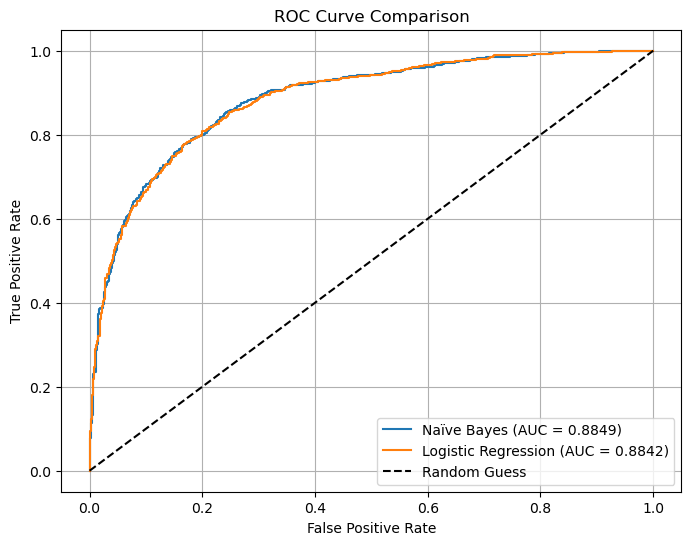

In [25]:
# ROC Curve and AUC Score
lr_proba = lr_grid.predict_proba(X_test)[:, 1]
nb_proba = nb_grid.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_proba)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'Naïve Bayes (AUC = {roc_auc_score(y_test, nb_proba):.4f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--',label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Step 5: Conclusion and Analysis

#### Model Performance Comparison:

Both **Logistic Regression** and **Naïve Bayes** achieved strong results, with accuracies around **80%** on the test set. However, when we look deeper into the classification metrics:

- **Logistic Regression** slightly outperformed in terms of **F1-score** (0.7726 vs. 0.7698), indicating a better balance between precision and recall.
- **Naïve Bayes** showed slightly higher **precision**, meaning it made fewer false positive errors when predicting "Placed".
- ROC curves and AUC scores also indicated that **Logistic Regression** had a marginally better overall classification performance.

> **Note:** While accuracy is a useful metric, it can be misleading in datasets with class imbalance (e.g., 58% NotPlaced vs 42% Placed). Therefore, **F1-score** is a more reliable metric here, as it balances **precision** (false positives) and **recall** (false negatives), which is especially critical in real-world placement predictions.

---

#### When to Prefer Each Model:

- **Naïve Bayes**:
  - Preferable when the dataset is very large and speed is essential.
  - Works well when features are nearly **independent**.
  - Simple, fast, and good baseline model.

- **Logistic Regression**:
  - Better for **interpretability** and when features are **correlated**.
  - Provides more reliable results with **continuous variables** and mixed data types.
  - More flexible in capturing real-world relationships.

| Scenario                                    | Prefer This Model        | Why                                       |
|--------------------------------------------|---------------------------|--------------------------------------------|
| Need **explainability & interpretability** | Logistic Regression       | Coefficients can be interpreted easily     |
| Need **fast, scalable baseline**           | Naïve Bayes               | Simple and fast even on large datasets     |
| Dealing with **non-linear data**           | Neither ideal – try others| Both are linear models                     |
| Need **slightly better recall**            | Logistic Regression       | Caught more actual "Placed" cases          |
| Need **simpler model** for deployment      | Naïve Bayes               | Fewer parameters, less tuning              |

---

#### Strengths and Weaknesses:

| Model          | Strengths                                                                                             | Weaknesses                                                                                   |
|----------------|--------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Naïve Bayes** | Very fast to train and predict, even on large datasets<br>Performs well on high-dimensional data<br>Simple to implement, often works surprisingly well<br>Robust to irrelevant features<br>Suitable when feature independence is a valid assumption | Assumes all features are independent (rare in real-world data)<br>May struggle when features are correlated<br>Less flexible with continuous data<br>Doesn’t model feature interactions |
| **Logistic Regression** | Interpretable coefficients for each feature<br>Handles both continuous and categorical variables well<br>Works better when features are correlated<br>Provides probabilistic outputs<br>Tunable through regularization (L1/L2)<br>Performs slightly better on recall in this dataset | Assumes linear decision boundaries<br>May underperform with non-linear data<br>Sensitive to outliers and multicollinearity without preprocessing |

---

### Final Insight:

Both models are effective for predicting placement outcomes, but **Logistic Regression** is the preferred choice when **interpretability** and **recall** are critical. On the other hand, **Naïve Bayes** remains a strong and efficient alternative, especially when **speed** and **simplicity** are priorities.
